## <center>Prueba 2 Simulación Chimborazo</center>

**Estudiante:** Adriana Castillo

**Personal:** 115

**Camas:** 300

**Respiradores:** 5

**UCI:** 5

**CASOS Iniciales:** 100


### Obtener Media

In [1]:
import pandas as pd
import numpy as np

url = 'Casos.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Chimborazo"]
filtro = df.iloc[0].loc['19/3/2020':]
media = filtro.mean()*3
print(media)

146.9142857142857


In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

#PARAMETROS
HOSPITALES = 1
CAMAS = 300
RESPIRADORES=5
UCI=5
PERSONAL=115

INFECTADOS= 100
TASA_CRECIMIENTO = int(media)
DIAS_INTERNADO = 10
DIAS_SIMULACION = 100

persona_recuperadas={}
persona_fallecidas={}

adultos_femenino=[]
adultos_masculino=[]

mayores_femenino=[]
mayores_masculino=[]

niños_femenino=[]
niños_masculino=[]

niños_femenino_sintomas=[]
niños_masculino_sintomas=[]
niños_femenino_nuemonia=[]
niños_masculino_nuemonia=[]
niños_femenino_cuidados=[]
niños_masculino_cuidados=[]
niños_femenino_fallecidos=[]
niños_masculino_fallecidos=[]
niños_femenino_recuperados=[]
niños_masculino_recuperados=[]

adultos_femeninos_nuemonia=[]
adultos_femeninos_cuidados=[]
adultos_femeninos_fallecidos=[]
adultos_femeninos_recuperados=[]
adultos_masculino_nuemonia=[]
adultos_masculino_cuidados=[]
adultos_masculino_fallecidos=[]
adultos_masculino_recuperados=[]

mayores_femeninos_nuemonia=[]
mayores_femeninos_cuidados=[]
mayores_femeninos_fallecidos=[]
mayores_femeninos_recuperados=[]
mayores_masculino_nuemonia=[]
mayores_masculino_cuidados=[]
mayores_masculino_fallecidos=[]
mayores_masculino_recuperados=[]


class Hospital(object):

    def __init__(self, env,num_cama,name,num_personal,num_uci, num_respiradores):
            self.env = env
            self.num_cama = num_cama
            self.num_personal = num_personal
            self.num_uci=num_uci
            self.num_respiradores=num_respiradores
            self.camas = simpy.Resource(env, num_cama)
            self.personal = simpy.Resource(env, num_personal)
            self.uci = simpy.Resource(env, num_uci)
            self.respiradores = simpy.Resource(env, num_respiradores)
            self.name = name
        
    def ingresar(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("Paciente Nº", paciente, "salió de la hospitalización en el día ", int(self.env.now))
            
    def ucis(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "salió de la UCI en el día ", int(self.env.now))
    
    def medicos(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-3, DIAS_INTERNADO+11))
        print("Paciente Nº", paciente, "finalizó su atención con el personal el día ", int(self.env.now))
    
def llegada_paciente(env, hospital, paciente):
    arrive = env.now
    tipo_paciente = random.randint(1,100)
    
    ##LLEGA MAYOR
    if (tipo_paciente <= 7 and tipo_paciente > 0):
        
        genero= random.randint(1,7)
        if(genero<=3):
            mayores_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_masculino_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                mayores_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Masculino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_masculino_recuperados.append(1)

                                    else:
                                        print("El paciente mayor (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_masculino_fallecidos.append(1)

                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama.")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
            
            
        else:
            ##MUJER
            mayores_femenino.append(1)
            
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=95):
                mayores_femeninos_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente mayor (Femenino) Nº", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente mayor (Femenino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                ##ASIGNAR UCI/RESPIRADOR
                                mayores_femeninos_cuidados.append(1)

                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente mayor (Femenino) Nº", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            mayores_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            mayores_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente mayor (Femenino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        mayores_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                mayores_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        mayores_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente mayor (Femenino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                mayores_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA

   
    elif (tipo_paciente <= 28 and tipo_paciente > 7):
        ### LLEGA NIÑO

        genero= random.randint(1,28)
        if(genero<=13):
            niños_masculino.append(1)
            ##HOMBRE
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_masculino_sintomas.append(1)

                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_masculino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niño Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niño Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_masculino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niño Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_masculino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_masculino_recuperados.append(1)
                                        else:
                                            print("El paciente niño Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_masculino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_masculino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_masculino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_masculino_recuperados.append(1)

                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niño Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_masculino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        else:
            niños_femenino.append(1)
            ##MUJER
            
            ##ETAPA SINTOMAS
            sintomas= random.randint(1,100)
            if (sintomas<=5):
                niños_femenino_sintomas.append(1)
                
                ##ETAPA NUEMONIA
                neumonia= random.randint(1,100)
                if (neumonia<=75): 
                    niños_femenino_nuemonia.append(1)

                    ##ASIGNAR CAMAS
                    with hospital.camas.request() as cama:
                        dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                        requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                        wait = env.now - arrive
                        if cama in requerimientoCamas:
                            print("Paciente niña Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                            yield env.process(hospital.ingresar(paciente))
                            arrive2 = env.now

                            ##ASIGNAR PERSONAL
                            with hospital.personal.request() as persona:
                                dias_esperando_personal = random.randint(1,2)
                                requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                                wait2 = env.now - arrive2
                                if persona in requerimientoPersonal:
                                    print("El paciente niña Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                    yield env.process(hospital.medicos(paciente))
                                arrive3 = env.now

                                intensivo= random.randint(1,100)
                                if (intensivo<=25):
                                    niños_femenino_cuidados.append(1)
                                    ##ASIGNAR UCI/RESPIRADOR
                                    with hospital.uci.request() as uci:
                                        dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                        requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                        wait3 = env.now - arrive3
                                        if uci in requerimientoUCI:
                                            print("El paciente niña Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                            yield env.process(hospital.ucis(paciente))
                                            estado = random.randint(1,100)
                                            if (estado <= 50) :
                                                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                                niños_femenino_fallecidos.append(1)
                                            else:
                                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                                niños_femenino_recuperados.append(1)
                                        else:
                                            print("El paciente niña Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            niños_femenino_fallecidos.append(1)
                                        ####Fin CUIDADOS INTENSIVOS
                                else:
                                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                    niños_femenino_recuperados.append(1)
                                    ####Fin ETAPA Intensivos

                                ####Fin PERSONAL
                        else:
                            print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                            niños_femenino_fallecidos.append(1)
                        ####Fin CAMAS
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                    print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                    niños_femenino_recuperados.append(1)
                ####Fin ETAPA NEUMONIA

            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente niña Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Sintomas")
                niños_femenino_recuperados.append(1)
            ####Fin ETAPA SINTOMAS
            
        
    else:
        ##LLEGA ADULTO
        
        genero= random.randint(1,65)
        
        if(genero<=30):
            adultos_masculino.append(1)
            ##HOMBRE  
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_masculino_nuemonia.append(1)
                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Masculino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now
                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Masculino) Nº", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_masculino_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Masculino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_masculino_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_masculino_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Masculino) Nº" , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_masculino_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_masculino_recuperados.append(1)
                                ####Fin ETAPA Intensivos

                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_masculino_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Masculino) Nº" , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_masculino_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        else:
            adultos_femenino.append(1)
        ##MUJER
        
            ##ETAPA NUEMONIA
            neumonia= random.randint(1,100)
            if (neumonia<=75):
                adultos_femeninos_nuemonia.append(1)

                ##ASIGNAR CAMAS
                with hospital.camas.request() as cama:
                    dias_esperando = random.randint(5,15) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimientoCamas = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive
                    if cama in requerimientoCamas:
                        print("Paciente adulto (Femenino) Nº ", paciente, " se le asigna una cama ", "hospital " , hospital.name)
                        yield env.process(hospital.ingresar(paciente))
                        arrive2 = env.now

                        ##ASIGNAR PERSONAL
                        with hospital.personal.request() as persona:
                            dias_esperando_personal = random.randint(1,2)
                            requerimientoPersonal = yield persona | env.timeout(dias_esperando_personal)
                            wait2 = env.now - arrive2
                            if persona in requerimientoPersonal:
                                print("El paciente adulto (Femenino) Nº ", paciente, " es atendido por el personal ", "hospital " , hospital.name)
                                yield env.process(hospital.medicos(paciente))
                            arrive3 = env.now

                            intensivo= random.randint(1,100)
                            if (intensivo<=25):
                                adultos_femeninos_cuidados.append(1)
                                ##ASIGNAR UCI/RESPIRADOR
                                with hospital.uci.request() as uci:
                                    dias_esperando_equipo = random.randint(7,21) #Numero de dias maximo que puede esperar sin ser asignado a una sala UCI del hospital
                                    requerimientoUCI = yield uci | env.timeout(dias_esperando)
                                    wait3 = env.now - arrive3
                                    if uci in requerimientoUCI:
                                        print("El paciente adulto (Femenino) Nº ", paciente, "accede a la UCI y se le asigna un respirador", "hospital " , hospital.name)
                                        yield env.process(hospital.ucis(paciente))
                                        estado = random.randint(1,100)
                                        if (estado <= 50) :
                                            persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                            adultos_femeninos_fallecidos.append(1)
                                        else:
                                            persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                            adultos_femeninos_recuperados.append(1)
                                    else:
                                        print("El paciente adulto (Femenino) Nº " , paciente, " en el hospital ", hospital.name, " espero ", wait3 , " dias y fallece por falta de acceso a la UCI y a un respirador")
                                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                                        adultos_femeninos_fallecidos.append(1)
                                    ####Fin CUIDADOS INTENSIVOS
                            else:
                                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Cuidados Intensivos")
                                adultos_femeninos_recuperados.append(1)
                                ####Fin ETAPA Intensivos
                            ####Fin PERSONAL
                    else:
                        print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, " espero ", wait , " dias y fallece por falta de acceso a una cama")
                        persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1  
                        adultos_femeninos_fallecidos.append(1)
                    ####Fin CAMAS
            else:
                persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1 
                print("Paciente adulto (Femenino) Nº " , paciente, "en el hospital ", hospital.name, "se ha recuperado en la etapa Neumonia")
                adultos_femeninos_recuperados.append(1)
            ####Fin ETAPA NEUMONIA
        
        
       
    
def ejecutar(env, tasa_crecimiento, infectados):
    hospital = Hospital(env, CAMAS, "General Docente",PERSONAL,UCI,RESPIRADORES)
    for i in range(infectados):
        asignar_hospital(env, hospital, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospital, paciente)
                
def asignar_hospital(env, hospital, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        print("Llega el paciente Nº", paciente, " en el día ", env.now)
        env.process(llegada_paciente(env, hospital, paciente))

print("\t\t\tSimulacion COVID-19 en Hospital General Docente (Chimborazo)\n")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO,INFECTADOS))
env.run(until=DIAS_SIMULACION)


			Simulacion COVID-19 en Hospital General Docente (Chimborazo)

Llega el paciente Nº 0  en el día  0
Llega el paciente Nº 1  en el día  0
Llega el paciente Nº 2  en el día  0
Llega el paciente Nº 3  en el día  0
Llega el paciente Nº 4  en el día  0
Llega el paciente Nº 5  en el día  0
Llega el paciente Nº 6  en el día  0
Llega el paciente Nº 7  en el día  0
Llega el paciente Nº 8  en el día  0
Llega el paciente Nº 9  en el día  0
Llega el paciente Nº 10  en el día  0
Llega el paciente Nº 11  en el día  0
Llega el paciente Nº 12  en el día  0
Llega el paciente Nº 13  en el día  0
Llega el paciente Nº 14  en el día  0
Llega el paciente Nº 15  en el día  0
Llega el paciente Nº 16  en el día  0
Llega el paciente Nº 17  en el día  0
Llega el paciente Nº 18  en el día  0
Llega el paciente Nº 19  en el día  0
Llega el paciente Nº 20  en el día  0
Llega el paciente Nº 21  en el día  0
Llega el paciente Nº 22  en el día  0
Llega el paciente Nº 23  en el día  0
Llega el paciente Nº 24  en el dí

Paciente adulto (Femenino) Nº  168  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  169  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  170  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  171  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  172  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  174  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  177  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  178  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  179  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  181  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  182  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  183  se le asigna una cama  hos

Paciente adulto (Femenino) Nº  374  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  375  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  377  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  378  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  379  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  380  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  382  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  385  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  386  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  388  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 389  se le asigna una cama  hospital  General Docente
Llega el paciente Nº 393  en el día  3
Llega el paciente Nº 394  e

Llega el paciente Nº 605  en el día  4
Llega el paciente Nº 606  en el día  4
Llega el paciente Nº 607  en el día  4
Llega el paciente Nº 608  en el día  4
Llega el paciente Nº 609  en el día  4
Llega el paciente Nº 610  en el día  4
Llega el paciente Nº 611  en el día  4
Llega el paciente Nº 612  en el día  4
Llega el paciente Nº 613  en el día  4
Llega el paciente Nº 614  en el día  4
Llega el paciente Nº 615  en el día  4
Llega el paciente Nº 616  en el día  4
Llega el paciente Nº 617  en el día  4
Llega el paciente Nº 618  en el día  4
Llega el paciente Nº 619  en el día  4
Llega el paciente Nº 620  en el día  4
Llega el paciente Nº 621  en el día  4
Llega el paciente Nº 622  en el día  4
Llega el paciente Nº 623  en el día  4
Llega el paciente Nº 624  en el día  4
Llega el paciente Nº 625  en el día  4
Llega el paciente Nº 626  en el día  4
Llega el paciente Nº 627  en el día  4
Llega el paciente Nº 628  en el día  4
Llega el paciente Nº 629  en el día  4
Llega el paciente Nº 630 

Llega el paciente Nº 934  en el día  6
Llega el paciente Nº 935  en el día  6
Llega el paciente Nº 936  en el día  6
Llega el paciente Nº 937  en el día  6
Llega el paciente Nº 938  en el día  6
Llega el paciente Nº 939  en el día  6
Llega el paciente Nº 940  en el día  6
Llega el paciente Nº 941  en el día  6
Llega el paciente Nº 942  en el día  6
Llega el paciente Nº 943  en el día  6
Llega el paciente Nº 944  en el día  6
Llega el paciente Nº 945  en el día  6
Llega el paciente Nº 946  en el día  6
Llega el paciente Nº 947  en el día  6
Llega el paciente Nº 948  en el día  6
Llega el paciente Nº 949  en el día  6
Llega el paciente Nº 950  en el día  6
Llega el paciente Nº 951  en el día  6
Llega el paciente Nº 952  en el día  6
Llega el paciente Nº 953  en el día  6
Llega el paciente Nº 954  en el día  6
Llega el paciente Nº 955  en el día  6
Llega el paciente Nº 956  en el día  6
Llega el paciente Nº 957  en el día  6
Llega el paciente Nº 958  en el día  6
Llega el paciente Nº 959 

El paciente adulto (Masculino) Nº 267  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  324  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 329  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 346  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  349  es atendido por el personal  hospital  General Docente
El paciente mayor (Femenino) Nº 358  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 363  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 377  es atendido por el personal  hospital  General Docente
Paciente Nº 66 salió de la hospitalización en el día  8
Paciente Nº 73 salió de la hospitalización en el día  8
Paciente Nº 105 salió de la hospitalización en el día  8
Paciente Nº 136 salió de la hospitalización en el día  8
Paciente Nº 141 salió de

Paciente niña Nº 1272 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  1274 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  1276 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 1277 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1279 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1281 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 1288 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1289 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 1290 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1294 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1295 en el hospital  

Paciente adulto (Femenino) Nº  721 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  724 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 758 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  766 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 782 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 789 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 810 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  812 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama


Llega el paciente Nº 1844  en el día  12
Llega el paciente Nº 1845  en el día  12
Llega el paciente Nº 1846  en el día  12
Llega el paciente Nº 1847  en el día  12
Llega el paciente Nº 1848  en el día  12
Llega el paciente Nº 1849  en el día  12
Llega el paciente Nº 1850  en el día  12
Llega el paciente Nº 1851  en el día  12
Llega el paciente Nº 1852  en el día  12
Paciente niño Nº 1707 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 1721 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 1723 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1724 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 1725 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  1729 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  1730 en el hospital  General Docen

Paciente adulto (Masculino) Nº 559 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 576 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 581 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 586 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  592 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 647 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 652 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 653 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama


Paciente adulto (Masculino) Nº 633 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  644 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 657 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 664 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  685 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  793 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  796 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  827 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una c

Paciente mayor (Masculino) Nº 111 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  123 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  140 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 280 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  375 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 499 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  86 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 117 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  195 en el hospital  General Docente se ha r

Llega el paciente Nº 2481  en el día  17
Llega el paciente Nº 2482  en el día  17
Llega el paciente Nº 2483  en el día  17
Llega el paciente Nº 2484  en el día  17
Llega el paciente Nº 2485  en el día  17
Llega el paciente Nº 2486  en el día  17
Llega el paciente Nº 2487  en el día  17
Llega el paciente Nº 2488  en el día  17
Llega el paciente Nº 2489  en el día  17
Llega el paciente Nº 2490  en el día  17
Llega el paciente Nº 2491  en el día  17
Llega el paciente Nº 2492  en el día  17
Llega el paciente Nº 2493  en el día  17
Llega el paciente Nº 2494  en el día  17
Llega el paciente Nº 2495  en el día  17
Llega el paciente Nº 2496  en el día  17
Llega el paciente Nº 2497  en el día  17
Llega el paciente Nº 2498  en el día  17
Llega el paciente Nº 2499  en el día  17
Llega el paciente Nº 2500  en el día  17
Llega el paciente Nº 2501  en el día  17
Llega el paciente Nº 2502  en el día  17
Llega el paciente Nº 2503  en el día  17
Llega el paciente Nº 2504  en el día  17
Llega el pacient

Paciente niño Nº 2619 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 2622 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2623 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2629 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2631 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 2635 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  2638 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2648 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2650 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 2651 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente n

Paciente niña Nº 2830 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2832 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  2833 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2836 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2840 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2841 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 2844 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  2846 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 2848 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 2849 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente n

Paciente adulto (Femenino) Nº  1854 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1881 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1891 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1897 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 1908 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1953 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 1960 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 1988 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una c

Paciente adulto (Femenino) Nº  2192 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2212 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2218 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2228 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2254 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2259 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2266 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2273 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente Nº 922 salió de la hospitalización en el día  23
Paciente Nº 923 salió de la hospitalización en el día  23
Llega el paciente Nº 3313  en el día  23
Llega el paciente Nº 3314  en el día  23
Llega el paciente Nº 3315  en el día  23
Llega el paciente Nº 3316  en el día  23
Llega el paciente Nº 3317  en el día  23
Llega el paciente Nº 3318  en el día  23
Llega el paciente Nº 3319  en el día  23
Llega el paciente Nº 3320  en el día  23
Llega el paciente Nº 3321  en el día  23
Llega el paciente Nº 3322  en el día  23
Llega el paciente Nº 3323  en el día  23
Llega el paciente Nº 3324  en el día  23
Llega el paciente Nº 3325  en el día  23
Llega el paciente Nº 3326  en el día  23
Llega el paciente Nº 3327  en el día  23
Llega el paciente Nº 3328  en el día  23
Llega el paciente Nº 3329  en el día  23
Llega el paciente Nº 3330  en el día  23
Llega el paciente Nº 3331  en el día  23
Llega el paciente Nº 3332  en el día  23
Llega el paciente Nº 3333  en el día  23
Llega el paciente Nº 33

Llega el paciente Nº 3533  en el día  24
Llega el paciente Nº 3534  en el día  24
Llega el paciente Nº 3535  en el día  24
Llega el paciente Nº 3536  en el día  24
Llega el paciente Nº 3537  en el día  24
Llega el paciente Nº 3538  en el día  24
Llega el paciente Nº 3539  en el día  24
Llega el paciente Nº 3540  en el día  24
Llega el paciente Nº 3541  en el día  24
Llega el paciente Nº 3542  en el día  24
Llega el paciente Nº 3543  en el día  24
Llega el paciente Nº 3544  en el día  24
Llega el paciente Nº 3545  en el día  24
Llega el paciente Nº 3546  en el día  24
Llega el paciente Nº 3547  en el día  24
Llega el paciente Nº 3548  en el día  24
Llega el paciente Nº 3549  en el día  24
Llega el paciente Nº 3550  en el día  24
Llega el paciente Nº 3551  en el día  24
Llega el paciente Nº 3552  en el día  24
Llega el paciente Nº 3553  en el día  24
Llega el paciente Nº 3554  en el día  24
Llega el paciente Nº 3555  en el día  24
Llega el paciente Nº 3556  en el día  24
Llega el pacient

Paciente niña Nº 3638 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3641 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3645 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente mayor (Masculino) Nº 3648 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  3650 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 3654 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3655 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3656 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3657 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3658 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente ad

Paciente adulto (Masculino) Nº 3880 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 3882 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 3885 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3887 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 3888 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 3891 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 3892 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 3893 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 46 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 196 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Pacie

Paciente niña Nº 4042 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  38 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  53 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 67 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 267 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 377 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 235 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  388 en el hospital  General Docente se ha recuperado en la etapa Cuidad

Paciente adulto (Femenino) Nº  2438 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2446 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2455 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 2459 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 2462 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2475 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 2499 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2507 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso

Paciente adulto (Masculino) Nº 2751 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2752 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2793 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2799 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2822 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2825 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
El paciente adulto (Masculino) Nº 329  en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Masculino) Nº 2897 en el hospital  General Docente  espero  9  dias y falle

Paciente adulto (Masculino) Nº 3631 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 3659 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 3680 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3683 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3689 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3694 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3719 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3739 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a u

Paciente mayor (Femenino) Nº 3797 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3836 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3840 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3857 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3862 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  1527 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  1819 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 1848 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Feme

Llega el paciente Nº 4782  en el día  33
Llega el paciente Nº 4783  en el día  33
Llega el paciente Nº 4784  en el día  33
Llega el paciente Nº 4785  en el día  33
Llega el paciente Nº 4786  en el día  33
Llega el paciente Nº 4787  en el día  33
Llega el paciente Nº 4788  en el día  33
Llega el paciente Nº 4789  en el día  33
Llega el paciente Nº 4790  en el día  33
Llega el paciente Nº 4791  en el día  33
Llega el paciente Nº 4792  en el día  33
Llega el paciente Nº 4793  en el día  33
Llega el paciente Nº 4794  en el día  33
Llega el paciente Nº 4795  en el día  33
Llega el paciente Nº 4796  en el día  33
Llega el paciente Nº 4797  en el día  33
Llega el paciente Nº 4798  en el día  33
Llega el paciente Nº 4799  en el día  33
Llega el paciente Nº 4800  en el día  33
Llega el paciente Nº 4801  en el día  33
Llega el paciente Nº 4802  en el día  33
Llega el paciente Nº 4803  en el día  33
Llega el paciente Nº 4804  en el día  33
Llega el paciente Nº 4805  en el día  33
Llega el pacient

Llega el paciente Nº 5012  en el día  34
Llega el paciente Nº 5013  en el día  34
Llega el paciente Nº 5014  en el día  34
Llega el paciente Nº 5015  en el día  34
Llega el paciente Nº 5016  en el día  34
Llega el paciente Nº 5017  en el día  34
Llega el paciente Nº 5018  en el día  34
Llega el paciente Nº 5019  en el día  34
Llega el paciente Nº 5020  en el día  34
Llega el paciente Nº 5021  en el día  34
Llega el paciente Nº 5022  en el día  34
Llega el paciente Nº 5023  en el día  34
Llega el paciente Nº 5024  en el día  34
Llega el paciente Nº 5025  en el día  34
Llega el paciente Nº 5026  en el día  34
Llega el paciente Nº 5027  en el día  34
Llega el paciente Nº 5028  en el día  34
Llega el paciente Nº 5029  en el día  34
Llega el paciente Nº 5030  en el día  34
Llega el paciente Nº 5031  en el día  34
Llega el paciente Nº 5032  en el día  34
Llega el paciente Nº 5033  en el día  34
Llega el paciente Nº 5034  en el día  34
Llega el paciente Nº 5035  en el día  34
Llega el pacient

Llega el paciente Nº 5173  en el día  35
Llega el paciente Nº 5174  en el día  35
Llega el paciente Nº 5175  en el día  35
Llega el paciente Nº 5176  en el día  35
Llega el paciente Nº 5177  en el día  35
Llega el paciente Nº 5178  en el día  35
Llega el paciente Nº 5179  en el día  35
Llega el paciente Nº 5180  en el día  35
Llega el paciente Nº 5181  en el día  35
Llega el paciente Nº 5182  en el día  35
Llega el paciente Nº 5183  en el día  35
Llega el paciente Nº 5184  en el día  35
Llega el paciente Nº 5185  en el día  35
Llega el paciente Nº 5186  en el día  35
Llega el paciente Nº 5187  en el día  35
Llega el paciente Nº 5188  en el día  35
Llega el paciente Nº 5189  en el día  35
Llega el paciente Nº 5190  en el día  35
Llega el paciente Nº 5191  en el día  35
Llega el paciente Nº 5192  en el día  35
Llega el paciente Nº 5193  en el día  35
Llega el paciente Nº 5194  en el día  35
Llega el paciente Nº 5195  en el día  35
Llega el paciente Nº 5196  en el día  35
Llega el pacient

Paciente adulto (Femenino) Nº  5321 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5322 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5325 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 5326 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  5331 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  5336 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 5337 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 5338 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5339 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 5341 en el hospital  General Docente se ha recuperado en la etapa Sinto

Paciente adulto (Femenino) Nº  3607 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3616 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3649 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3662 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  3671 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 3704 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 3706 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 3740 en el hospital  General Docente  espero  12  dias y fallece por falta de ac

Paciente adulto (Femenino) Nº  4705 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 4724 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4774 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente niña Nº 4775 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4779 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4786 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  4797 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 4800 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente

Paciente adulto (Masculino) Nº 1907 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 1913 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Masculino) Nº 1965 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  2033 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2035 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Masculino) Nº 2086 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  2087 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  2194 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2315 en el hospital  General Docent

Paciente adulto (Masculino) Nº 2883 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 2987 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  1934 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2036 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2219 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Masculino) Nº 2920 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  1809  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  1856  es atendido por el personal  hospital  General Docente
El paciente mayor (Masculino) Nº 1917  es atendido por el personal  hospital  General Docente
El paciente adult

Llega el paciente Nº 6146  en el día  42
Llega el paciente Nº 6147  en el día  42
Llega el paciente Nº 6148  en el día  42
Llega el paciente Nº 6149  en el día  42
Llega el paciente Nº 6150  en el día  42
Llega el paciente Nº 6151  en el día  42
Llega el paciente Nº 6152  en el día  42
Llega el paciente Nº 6153  en el día  42
Llega el paciente Nº 6154  en el día  42
Llega el paciente Nº 6155  en el día  42
Llega el paciente Nº 6156  en el día  42
Llega el paciente Nº 6157  en el día  42
Llega el paciente Nº 6158  en el día  42
Llega el paciente Nº 6159  en el día  42
Llega el paciente Nº 6160  en el día  42
Llega el paciente Nº 6161  en el día  42
Llega el paciente Nº 6162  en el día  42
Llega el paciente Nº 6163  en el día  42
Llega el paciente Nº 6164  en el día  42
Llega el paciente Nº 6165  en el día  42
Llega el paciente Nº 6166  en el día  42
Llega el paciente Nº 6167  en el día  42
Llega el paciente Nº 6168  en el día  42
Llega el paciente Nº 6169  en el día  42
Llega el pacient

Llega el paciente Nº 6342  en el día  43
Llega el paciente Nº 6343  en el día  43
Llega el paciente Nº 6344  en el día  43
Llega el paciente Nº 6345  en el día  43
Llega el paciente Nº 6346  en el día  43
Llega el paciente Nº 6347  en el día  43
Llega el paciente Nº 6348  en el día  43
Llega el paciente Nº 6349  en el día  43
Llega el paciente Nº 6350  en el día  43
Llega el paciente Nº 6351  en el día  43
Llega el paciente Nº 6352  en el día  43
Llega el paciente Nº 6353  en el día  43
Llega el paciente Nº 6354  en el día  43
Llega el paciente Nº 6355  en el día  43
Llega el paciente Nº 6356  en el día  43
Llega el paciente Nº 6357  en el día  43
Llega el paciente Nº 6358  en el día  43
Llega el paciente Nº 6359  en el día  43
Llega el paciente Nº 6360  en el día  43
Llega el paciente Nº 6361  en el día  43
Llega el paciente Nº 6362  en el día  43
Llega el paciente Nº 6363  en el día  43
Llega el paciente Nº 6364  en el día  43
Llega el paciente Nº 6365  en el día  43
Llega el pacient

Paciente niña Nº 6381 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 6382 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 6385 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  6389 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  6391 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 6395 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  6399 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 6401 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 6403 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  6406 en el hospital  General Docente se ha recuperado en la etapa Neumo

Paciente adulto (Masculino) Nº 5116 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5121 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5160 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5168 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5181 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5230 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5234 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente niña Nº 5245 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
P

Paciente adulto (Masculino) Nº 5768 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5783 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5795 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5814 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5837 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5861 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5863 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  5902 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  4983  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 2989  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  4985  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4991  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  4997  se le asigna una cama  hospital  General Docente
El paciente mayor (Femenino) Nº 2030 accede a la UCI y se le asigna un respirador hospital  General Docente
Paciente adulto (Femenino) Nº  5009  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5015  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5030  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  5038  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  5043  se le asigna una cama  hospital  General Docente
Paciente adulto (

Paciente Nº 3136 salió de la hospitalización en el día  49
Paciente Nº 3195 salió de la hospitalización en el día  49
Paciente Nº 3270 salió de la hospitalización en el día  49
Paciente Nº 3328 salió de la hospitalización en el día  49
Paciente Nº 3454 salió de la hospitalización en el día  49
Paciente Nº 3488 salió de la hospitalización en el día  49
Paciente Nº 3490 salió de la hospitalización en el día  49
Paciente Nº 3509 salió de la hospitalización en el día  49
Paciente Nº 3705 salió de la hospitalización en el día  49
Paciente Nº 3742 salió de la hospitalización en el día  49
Paciente Nº 3748 salió de la hospitalización en el día  49
Paciente Nº 4041 salió de la hospitalización en el día  49
Paciente Nº 4199 salió de la hospitalización en el día  49
Paciente Nº 4250 salió de la hospitalización en el día  49
Paciente Nº 4368 salió de la hospitalización en el día  49
Paciente Nº 4501 salió de la hospitalización en el día  49
Paciente Nº 4585 salió de la hospitalización en el día  

Llega el paciente Nº 7295  en el día  50
Llega el paciente Nº 7296  en el día  50
Llega el paciente Nº 7297  en el día  50
Llega el paciente Nº 7298  en el día  50
Llega el paciente Nº 7299  en el día  50
Llega el paciente Nº 7300  en el día  50
Llega el paciente Nº 7301  en el día  50
Llega el paciente Nº 7302  en el día  50
Llega el paciente Nº 7303  en el día  50
Llega el paciente Nº 7304  en el día  50
Llega el paciente Nº 7305  en el día  50
Llega el paciente Nº 7306  en el día  50
Llega el paciente Nº 7307  en el día  50
Llega el paciente Nº 7308  en el día  50
Llega el paciente Nº 7309  en el día  50
Llega el paciente Nº 7310  en el día  50
Llega el paciente Nº 7311  en el día  50
Llega el paciente Nº 7312  en el día  50
Llega el paciente Nº 7313  en el día  50
Llega el paciente Nº 7314  en el día  50
Llega el paciente Nº 7315  en el día  50
Llega el paciente Nº 7316  en el día  50
Llega el paciente Nº 7317  en el día  50
Llega el paciente Nº 7318  en el día  50
Llega el pacient

Paciente Nº 4027 salió de la hospitalización en el día  51
Paciente Nº 4078 salió de la hospitalización en el día  51
Paciente Nº 4082 salió de la hospitalización en el día  51
Paciente Nº 4202 salió de la hospitalización en el día  51
Paciente Nº 4294 salió de la hospitalización en el día  51
Paciente Nº 4348 salió de la hospitalización en el día  51
Paciente Nº 4418 salió de la hospitalización en el día  51
Paciente Nº 4439 salió de la hospitalización en el día  51
Paciente Nº 4500 salió de la hospitalización en el día  51
Paciente Nº 4527 salió de la hospitalización en el día  51
Paciente Nº 4535 salió de la hospitalización en el día  51
Paciente Nº 4783 salió de la hospitalización en el día  51
Paciente Nº 4884 salió de la hospitalización en el día  51
Paciente Nº 4906 salió de la hospitalización en el día  51
Paciente Nº 4923 salió de la hospitalización en el día  51
Paciente Nº 4953 salió de la hospitalización en el día  51
Llega el paciente Nº 7401  en el día  51
Llega el pacien

Llega el paciente Nº 7689  en el día  52
Llega el paciente Nº 7690  en el día  52
Llega el paciente Nº 7691  en el día  52
Llega el paciente Nº 7692  en el día  52
Paciente niña Nº 7549 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7550 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7551 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  7552 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  7558 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 7571 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 7573 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 7578 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 7579 en el hospital  General Docente se h

Paciente niña Nº 7829 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 7836 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  1311 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente niña Nº 1260 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Femenino) Nº  1828  en el hospital  General Docente  espero  15  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 1510  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  2104  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  5819 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) N

Paciente adulto (Femenino) Nº  6337 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6366 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  2377 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 6398 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6411 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6418 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6437 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6488 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una c

Paciente adulto (Masculino) Nº 6494 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6534 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 6550 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  6561 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6579 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6583 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 6587 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6600 en el hospital  General Docente  espero  10  dias y fallece por falta de ac

Paciente Nº 5582 salió de la hospitalización en el día  57
Paciente Nº 5802 salió de la hospitalización en el día  57
Llega el paciente Nº 8277  en el día  57
Llega el paciente Nº 8278  en el día  57
Llega el paciente Nº 8279  en el día  57
Llega el paciente Nº 8280  en el día  57
Llega el paciente Nº 8281  en el día  57
Llega el paciente Nº 8282  en el día  57
Llega el paciente Nº 8283  en el día  57
Llega el paciente Nº 8284  en el día  57
Llega el paciente Nº 8285  en el día  57
Llega el paciente Nº 8286  en el día  57
Llega el paciente Nº 8287  en el día  57
Llega el paciente Nº 8288  en el día  57
Llega el paciente Nº 8289  en el día  57
Llega el paciente Nº 8290  en el día  57
Llega el paciente Nº 8291  en el día  57
Llega el paciente Nº 8292  en el día  57
Llega el paciente Nº 8293  en el día  57
Llega el paciente Nº 8294  en el día  57
Llega el paciente Nº 8295  en el día  57
Llega el paciente Nº 8296  en el día  57
Llega el paciente Nº 8297  en el día  57
Llega el paciente Nº 

Paciente adulto (Femenino) Nº  7664 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7672 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  4171 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4734 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4755 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 5015 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4560 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  4614 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4811 en el hosp

Paciente adulto (Femenino) Nº  7335 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7343 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7352 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7368 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7374 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7389 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 7417 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7420 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  7094 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7095 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7096 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7101 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 7135 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 7136 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  7158 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7171 en el hospital  General Docente  espero  10  dias y fallece por falta de acce

El paciente adulto (Masculino) Nº 921  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Masculino) Nº 1487  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
El paciente adulto (Femenino) Nº  3354  en el hospital  General Docente  espero  14  dias y fallece por falta de acceso a la UCI y a un respirador
Paciente adulto (Femenino) Nº  2801 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 3756 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 6852 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6883 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  6896 en el hospital  General Docente  esp

Paciente adulto (Masculino) Nº 7093 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7106 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7124 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7170 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  7196 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7202 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente niña Nº 7234 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 7235 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cam

Paciente adulto (Femenino) Nº  5769 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  6043 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 6109 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  6155 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 6205 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 4846 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  5065 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 5235 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  5562 en el hospital  General Docent

Llega el paciente Nº 9345  en el día  64
Llega el paciente Nº 9346  en el día  64
Llega el paciente Nº 9347  en el día  64
Llega el paciente Nº 9348  en el día  64
Llega el paciente Nº 9349  en el día  64
Llega el paciente Nº 9350  en el día  64
Llega el paciente Nº 9351  en el día  64
Llega el paciente Nº 9352  en el día  64
Llega el paciente Nº 9353  en el día  64
Llega el paciente Nº 9354  en el día  64
Llega el paciente Nº 9355  en el día  64
Llega el paciente Nº 9356  en el día  64
Llega el paciente Nº 9357  en el día  64
Llega el paciente Nº 9358  en el día  64
Llega el paciente Nº 9359  en el día  64
Llega el paciente Nº 9360  en el día  64
Llega el paciente Nº 9361  en el día  64
Llega el paciente Nº 9362  en el día  64
Llega el paciente Nº 9363  en el día  64
Llega el paciente Nº 9364  en el día  64
Llega el paciente Nº 9365  en el día  64
Llega el paciente Nº 9366  en el día  64
Llega el paciente Nº 9367  en el día  64
Llega el paciente Nº 9368  en el día  64
Llega el pacient

Paciente adulto (Femenino) Nº  9464 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9465 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9466 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9467 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9469 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9473 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9475 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9477 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9480 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9481 en el hospital  General Docente se ha recuperado en la etapa Sinto

Paciente niño Nº 9728 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9729 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9730 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9731 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 9732 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9733 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9735 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  4049 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Masculino) Nº 2989 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  3386 en el hospital  General Docente se ha recuperado en la eta

Paciente adulto (Masculino) Nº 9739 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 9740 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9741 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 9742 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 9746 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9750 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9751 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  9755 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9759 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 9760 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente a

Llega el paciente Nº 10021  en el día  68
Llega el paciente Nº 10022  en el día  68
Llega el paciente Nº 10023  en el día  68
Llega el paciente Nº 10024  en el día  68
Llega el paciente Nº 10025  en el día  68
Llega el paciente Nº 10026  en el día  68
Llega el paciente Nº 10027  en el día  68
Llega el paciente Nº 10028  en el día  68
Paciente adulto (Femenino) Nº  9885 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  9887 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 9889 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9892 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 9893 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 9894 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 9902 en el hospital  General Docente se ha recuperado

Paciente niña Nº 10122 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10125 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10126 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10128 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10133 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10135 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10136 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente mayor (Masculino) Nº 10140 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10142 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10143 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño N

Paciente niña Nº 10238 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10239 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10242 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 10246 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10247 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 10251 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  10254 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10257 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10261 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10271 en el hospital  General Docente se ha recuperado en la etapa Sintomas


Paciente adulto (Masculino) Nº 10444 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10445 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10451 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10456 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10459 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10460 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10462 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10463 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10464 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  3028 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El p

Paciente niño Nº 10587 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 10588 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 10589 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10594 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 10595 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10597 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10598 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10600 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  10601 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 10608 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 10612 en el

Paciente adulto (Masculino) Nº 9354 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9365 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9371 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9429 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9440 en el hospital  General Docente  espero  9  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 5498 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  9452 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9456 en el hospital  General Docente  espero  8  dias y fallece por falta de acceso a una cama
P

Paciente adulto (Femenino) Nº  9853 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9858 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9878 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9900 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9910 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9920 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 9974 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  9991 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a u

Paciente mayor (Femenino) Nº 7363 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente mayor (Femenino) Nº 7714 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
Paciente adulto (Femenino) Nº  7729 en el hospital  General Docente se ha recuperado en la etapa Cuidados Intensivos
El paciente adulto (Masculino) Nº 7434  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 7581  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  9085  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  9093  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  7034  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  9096  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 7039  es atendido por el personal  hospital  General Docente
Paciente adul

Llega el paciente Nº 11225  en el día  77
Llega el paciente Nº 11226  en el día  77
Llega el paciente Nº 11227  en el día  77
Llega el paciente Nº 11228  en el día  77
Llega el paciente Nº 11229  en el día  77
Llega el paciente Nº 11230  en el día  77
Llega el paciente Nº 11231  en el día  77
Llega el paciente Nº 11232  en el día  77
Llega el paciente Nº 11233  en el día  77
Llega el paciente Nº 11234  en el día  77
Llega el paciente Nº 11235  en el día  77
Llega el paciente Nº 11236  en el día  77
Llega el paciente Nº 11237  en el día  77
Llega el paciente Nº 11238  en el día  77
Llega el paciente Nº 11239  en el día  77
Llega el paciente Nº 11240  en el día  77
Llega el paciente Nº 11241  en el día  77
Llega el paciente Nº 11242  en el día  77
Llega el paciente Nº 11243  en el día  77
Llega el paciente Nº 11244  en el día  77
Llega el paciente Nº 11245  en el día  77
Llega el paciente Nº 11246  en el día  77
Llega el paciente Nº 11247  en el día  77
Llega el paciente Nº 11248  en el 

Paciente Nº 7728 salió de la hospitalización en el día  78
Paciente Nº 7859 salió de la hospitalización en el día  78
Paciente Nº 7882 salió de la hospitalización en el día  78
Paciente Nº 8223 salió de la hospitalización en el día  78
Paciente Nº 8277 salió de la hospitalización en el día  78
Paciente Nº 8434 salió de la hospitalización en el día  78
Paciente Nº 8506 salió de la hospitalización en el día  78
Paciente Nº 8532 salió de la hospitalización en el día  78
Paciente Nº 7613 finalizó su atención con el personal el día  78
Paciente Nº 8644 salió de la hospitalización en el día  78
Paciente Nº 8790 salió de la hospitalización en el día  78
Paciente Nº 8863 salió de la hospitalización en el día  78
Paciente Nº 8944 salió de la hospitalización en el día  78
Llega el paciente Nº 11343  en el día  78
Llega el paciente Nº 11344  en el día  78
Llega el paciente Nº 11345  en el día  78
Llega el paciente Nº 11346  en el día  78
Llega el paciente Nº 11347  en el día  78
Llega el paciente

Llega el paciente Nº 11533  en el día  79
Llega el paciente Nº 11534  en el día  79
Llega el paciente Nº 11535  en el día  79
Llega el paciente Nº 11536  en el día  79
Llega el paciente Nº 11537  en el día  79
Llega el paciente Nº 11538  en el día  79
Llega el paciente Nº 11539  en el día  79
Llega el paciente Nº 11540  en el día  79
Llega el paciente Nº 11541  en el día  79
Llega el paciente Nº 11542  en el día  79
Llega el paciente Nº 11543  en el día  79
Llega el paciente Nº 11544  en el día  79
Llega el paciente Nº 11545  en el día  79
Llega el paciente Nº 11546  en el día  79
Llega el paciente Nº 11547  en el día  79
Llega el paciente Nº 11548  en el día  79
Llega el paciente Nº 11549  en el día  79
Llega el paciente Nº 11550  en el día  79
Llega el paciente Nº 11551  en el día  79
Llega el paciente Nº 11552  en el día  79
Llega el paciente Nº 11553  en el día  79
Llega el paciente Nº 11554  en el día  79
Llega el paciente Nº 11555  en el día  79
Llega el paciente Nº 11556  en el 

Llega el paciente Nº 11713  en el día  80
Llega el paciente Nº 11714  en el día  80
Llega el paciente Nº 11715  en el día  80
Llega el paciente Nº 11716  en el día  80
Llega el paciente Nº 11717  en el día  80
Llega el paciente Nº 11718  en el día  80
Llega el paciente Nº 11719  en el día  80
Llega el paciente Nº 11720  en el día  80
Llega el paciente Nº 11721  en el día  80
Llega el paciente Nº 11722  en el día  80
Llega el paciente Nº 11723  en el día  80
Llega el paciente Nº 11724  en el día  80
Llega el paciente Nº 11725  en el día  80
Llega el paciente Nº 11726  en el día  80
Llega el paciente Nº 11727  en el día  80
Llega el paciente Nº 11728  en el día  80
Llega el paciente Nº 11729  en el día  80
Llega el paciente Nº 11730  en el día  80
Llega el paciente Nº 11731  en el día  80
Llega el paciente Nº 11732  en el día  80
Llega el paciente Nº 11733  en el día  80
Llega el paciente Nº 11734  en el día  80
Llega el paciente Nº 11735  en el día  80
Llega el paciente Nº 11736  en el 

Paciente adulto (Femenino) Nº  11796 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11798 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  11799 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 11801 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11809 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  11810 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 11813 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 11816 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 11818 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  11819 en el hospital  General Docente se ha recuperado en la etapa Neumonia


Paciente adulto (Masculino) Nº 11996 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 12005 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 12006 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 12008 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 12010 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12011 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 12013 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  12018 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  12024 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 12025 en el hospital  General Docente se ha recuperado en la etapa Sintomas


Paciente adulto (Masculino) Nº 10244 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10262 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10317 en el hospital  General Docente  espero  13  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 10362 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10389 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 10397 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 10404 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  10413 en el hospital  General Docente  espero  12  dias y fallece por falta

Paciente mayor (Masculino) Nº 11359 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto (Masculino) Nº 11399 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11410 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11420 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11423 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11440 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11452 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11465 en el hospital  General Docente  espero  6  dias y fallece por falta de ac

El paciente adulto (Femenino) Nº  8120  es atendido por el personal  hospital  General Docente
El paciente mayor (Femenino) Nº 8419  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  10474  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 8520  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  10476  se le asigna una cama  hospital  General Docente
El paciente adulto (Femenino) Nº  8631  es atendido por el personal  hospital  General Docente
Paciente adulto (Masculino) Nº  10479  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10492  se le asigna una cama  hospital  General Docente
Paciente mayor (Femenino) Nº 10498  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10499  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  10508  se le asigna una cama  hospital  General Docente
Paciente a

Llega el paciente Nº 12683  en el día  87
Llega el paciente Nº 12684  en el día  87
Llega el paciente Nº 12685  en el día  87
Llega el paciente Nº 12686  en el día  87
Llega el paciente Nº 12687  en el día  87
Llega el paciente Nº 12688  en el día  87
Llega el paciente Nº 12689  en el día  87
Llega el paciente Nº 12690  en el día  87
Llega el paciente Nº 12691  en el día  87
Llega el paciente Nº 12692  en el día  87
Llega el paciente Nº 12693  en el día  87
Llega el paciente Nº 12694  en el día  87
Llega el paciente Nº 12695  en el día  87
Llega el paciente Nº 12696  en el día  87
Llega el paciente Nº 12697  en el día  87
Llega el paciente Nº 12698  en el día  87
Llega el paciente Nº 12699  en el día  87
Llega el paciente Nº 12700  en el día  87
Llega el paciente Nº 12701  en el día  87
Llega el paciente Nº 12702  en el día  87
Llega el paciente Nº 12703  en el día  87
Llega el paciente Nº 12704  en el día  87
Llega el paciente Nº 12705  en el día  87
Llega el paciente Nº 12706  en el 

Llega el paciente Nº 12905  en el día  88
Llega el paciente Nº 12906  en el día  88
Llega el paciente Nº 12907  en el día  88
Llega el paciente Nº 12908  en el día  88
Llega el paciente Nº 12909  en el día  88
Llega el paciente Nº 12910  en el día  88
Llega el paciente Nº 12911  en el día  88
Llega el paciente Nº 12912  en el día  88
Llega el paciente Nº 12913  en el día  88
Llega el paciente Nº 12914  en el día  88
Llega el paciente Nº 12915  en el día  88
Llega el paciente Nº 12916  en el día  88
Llega el paciente Nº 12917  en el día  88
Llega el paciente Nº 12918  en el día  88
Llega el paciente Nº 12919  en el día  88
Llega el paciente Nº 12920  en el día  88
Llega el paciente Nº 12921  en el día  88
Llega el paciente Nº 12922  en el día  88
Llega el paciente Nº 12923  en el día  88
Llega el paciente Nº 12924  en el día  88
Llega el paciente Nº 12925  en el día  88
Llega el paciente Nº 12926  en el día  88
Llega el paciente Nº 12927  en el día  88
Llega el paciente Nº 12928  en el 

Paciente adulto (Femenino) Nº  13000 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13002 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 13004 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13005 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 13010 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 13011 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 13014 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 13016 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  13017 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Masculino) Nº 13020 en el hospital  General Docente se ha recuperado en la etapa Neumonia


Paciente niño Nº 11355 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11400 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 11414 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11431 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11444 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11460 en el hospital  General Docente  espero  12  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 11503 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  11505 en el hospital  General Docente  espero  11  dias y fallece por falta de acceso a u

Paciente adulto (Femenino) Nº  12233 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12237 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12238 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12262 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12297 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente mayor (Femenino) Nº 12300 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12309 en el hospital  General Docente  espero  7  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12389 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a

Paciente adulto (Masculino) Nº 12572 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente mayor (Masculino) Nº 12589 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama.
Paciente adulto (Femenino) Nº  12596 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12599 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12627 en el hospital  General Docente  espero  6  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12694 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12710 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12734 en el hospital  General Docente  espero  5  dias y fallece por falta de ac

Paciente adulto (Femenino) Nº  12833 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12842 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12845 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente niño Nº 12852 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12853 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12860 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  12887 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12892 en el hospital  General Docente  espero  5  dias y fallece por falta de acceso a una cam

El paciente adulto (Femenino) Nº  9503  es atendido por el personal  hospital  General Docente
El paciente adulto (Masculino) Nº 9752  es atendido por el personal  hospital  General Docente
El paciente adulto (Femenino) Nº  8944 accede a la UCI y se le asigna un respirador hospital  General Docente
El paciente adulto (Masculino) Nº  6951 accede a la UCI y se le asigna un respirador hospital  General Docente
El paciente adulto (Masculino) Nº 10108  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  11894  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  11920  se le asigna una cama  hospital  General Docente
El paciente adulto (Masculino) Nº 10168  es atendido por el personal  hospital  General Docente
Paciente adulto (Femenino) Nº  11921  se le asigna una cama  hospital  General Docente
Paciente adulto (Femenino) Nº  11935  se le asigna una cama  hospital  General Docente
Paciente adulto (Masculino) Nº  11940  se le asig

Llega el paciente Nº 14020  en el día  96
Llega el paciente Nº 14021  en el día  96
Llega el paciente Nº 14022  en el día  96
Llega el paciente Nº 14023  en el día  96
Llega el paciente Nº 14024  en el día  96
Llega el paciente Nº 14025  en el día  96
Llega el paciente Nº 14026  en el día  96
Llega el paciente Nº 14027  en el día  96
Llega el paciente Nº 14028  en el día  96
Llega el paciente Nº 14029  en el día  96
Llega el paciente Nº 14030  en el día  96
Llega el paciente Nº 14031  en el día  96
Llega el paciente Nº 14032  en el día  96
Llega el paciente Nº 14033  en el día  96
Llega el paciente Nº 14034  en el día  96
Llega el paciente Nº 14035  en el día  96
Llega el paciente Nº 14036  en el día  96
Llega el paciente Nº 14037  en el día  96
Llega el paciente Nº 14038  en el día  96
Llega el paciente Nº 14039  en el día  96
Llega el paciente Nº 14040  en el día  96
Llega el paciente Nº 14041  en el día  96
Llega el paciente Nº 14042  en el día  96
Llega el paciente Nº 14043  en el 

Paciente niño Nº 14123 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14124 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  14125 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 14126 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14127 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adulto (Femenino) Nº  14128 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 14137 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  14138 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14139 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14140 en el hospital  General Docente se ha recuperado en la etapa Sintomas


Paciente adulto (Femenino) Nº  14371 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niño Nº 14372 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niño Nº 14376 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14377 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14381 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14382 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Femenino) Nº  14383 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente niña Nº 14389 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente niña Nº 14390 en el hospital  General Docente se ha recuperado en la etapa Sintomas
Paciente adulto (Masculino) Nº 14396 en el hospital  General Docente se ha recuperado en la etapa Neumonia
Paciente adult

Paciente adulto (Masculino) Nº 12991 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 12998 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13022 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13025 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Femenino) Nº  13037 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13043 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13052 en el hospital  General Docente  espero  10  dias y fallece por falta de acceso a una cama
Paciente adulto (Masculino) Nº 13070 en el hospital  General Docente  espero  10  dias y fallece por fal

In [3]:
niñosTotal=len(niños_masculino)+len(niños_femenino)

niñosSintomas=len(niños_masculino_sintomas)+len(niños_femenino_sintomas)
niñosNeumonia=len(niños_masculino_nuemonia)+len(niños_femenino_nuemonia)
niñosUCI=len(niños_masculino_cuidados)+len(niños_femenino_cuidados)
niñosFallecidos=len(niños_masculino_fallecidos)+len(niños_femenino_fallecidos)
niñosRecuperados=len(niños_masculino_recuperados)+len(niños_femenino_recuperados)


adultosTotal=len(adultos_masculino)+len(adultos_femenino)

adultosSintomas=len(adultos_masculino)
adultosNeumonia=len(adultos_masculino_nuemonia)+len(adultos_femeninos_nuemonia)
adultosUCI=len(adultos_masculino_cuidados)+len(adultos_femeninos_cuidados)
adultosFallecidos=len(adultos_masculino_fallecidos)+len(adultos_femeninos_fallecidos)
adultosRecuperados=len(adultos_masculino_recuperados)+len(adultos_femeninos_recuperados)


mayoresTotal=len(mayores_masculino)+len(mayores_femenino)

mayoresSintomas=len(mayores_masculino)
mayoresNeumonia=len(mayores_masculino_nuemonia)+len(mayores_femeninos_nuemonia)
mayoresUCI=len(mayores_masculino_cuidados)+len(mayores_femeninos_cuidados)
mayoresFallecidos=len(mayores_masculino_fallecidos)+len(mayores_femeninos_fallecidos)
mayoresRecuperados=len(mayores_masculino_recuperados)+len(mayores_femeninos_recuperados)

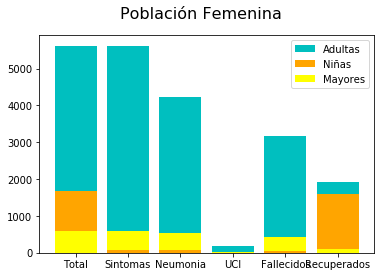

In [4]:
fig,ax=pp.subplots()

fig.suptitle('Población Femenina', fontsize=16)


ax.bar('Total',len(adultos_femenino),label='Adultas',color='c')
ax.bar('Total',len(niños_femenino),label='Niñas',color='orange')
ax.bar('Total',len(mayores_femenino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_femenino),color='c')
ax.bar('Sintomas',len(mayores_femenino),color='yellow')
ax.bar('Sintomas',len(niños_femenino_sintomas),color='orange')



ax.bar('Neumonia',len(adultos_femeninos_nuemonia),color='c')
ax.bar('Neumonia',len(mayores_femeninos_nuemonia),color='yellow')
ax.bar('Neumonia',len(niños_femenino_nuemonia),color='orange')


ax.bar('UCI',len(adultos_femeninos_cuidados),color='c')
ax.bar('UCI',len(mayores_femeninos_cuidados),color='yellow')
ax.bar('UCI',len(niños_femenino_cuidados),color='orange')


ax.bar('Fallecidos',len(adultos_femeninos_fallecidos),color='c')
ax.bar('Fallecidos',len(mayores_femeninos_fallecidos),color='yellow')
ax.bar('Fallecidos',len(niños_femenino_fallecidos),color='orange')

ax.bar('Recuperados',len(adultos_femeninos_recuperados),color='c')
ax.bar('Recuperados',len(niños_femenino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_femeninos_recuperados),color='yellow')


ax.legend()

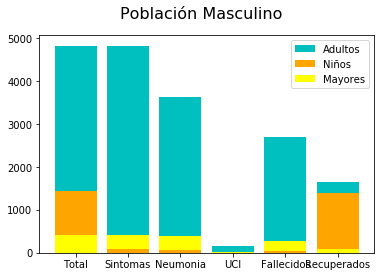

In [5]:
fig,ax=pp.subplots()

fig.suptitle('Población Masculino', fontsize=16)


ax.bar('Total',len(adultos_masculino),label='Adultos',color='c')
ax.bar('Total',len(niños_masculino),label='Niños',color='orange')
ax.bar('Total',len(mayores_masculino),label='Mayores',color='yellow')


ax.bar('Sintomas',len(adultos_masculino),color='c')
ax.bar('Sintomas',len(mayores_masculino),color='yellow')
ax.bar('Sintomas',len(niños_masculino_sintomas),color='orange')


ax.bar('Neumonia',len(adultos_masculino_nuemonia),color='c')
ax.bar('Neumonia',len(mayores_masculino_nuemonia),color='yellow')
ax.bar('Neumonia',len(niños_masculino_nuemonia),color='orange')


ax.bar('UCI',len(adultos_masculino_cuidados),color='c')
ax.bar('UCI',len(mayores_masculino_cuidados),color='yellow')
ax.bar('UCI',len(niños_masculino_cuidados),color='orange')


ax.bar('Fallecidos',len(adultos_masculino_fallecidos),color='c')
ax.bar('Fallecidos',len(mayores_masculino_fallecidos),color='yellow')
ax.bar('Fallecidos',len(niños_masculino_fallecidos),color='orange')


ax.bar('Recuperados',len(adultos_masculino_recuperados),color='c')
ax.bar('Recuperados',len(niños_masculino_recuperados),color='orange')
ax.bar('Recuperados',len(mayores_masculino_recuperados),color='yellow')


ax.legend()

In [6]:
import pandas as pd

resultado=pd.DataFrame(columns=('Total','Sintomas','Neumonia','UCI','Fallecidos','Recuperados'))
resultado.loc[len(resultado)]=[niñosTotal,niñosSintomas,niñosNeumonia,niñosUCI,niñosFallecidos,niñosRecuperados]
resultado=resultado.rename(index={0:'Niños'})

resultado.loc[len(resultado)]=[adultosTotal,adultosSintomas,adultosNeumonia,adultosUCI,adultosFallecidos,adultosRecuperados]
resultado=resultado.rename(index={1:'Adultos'})

resultado.loc[len(resultado)]=[mayoresTotal,mayoresSintomas,mayoresNeumonia,mayoresUCI,mayoresFallecidos,mayoresRecuperados]
resultado=resultado.rename(index={2:'Mayores'})
resultado

,Total,Sintomas,Neumonia,UCI,Fallecidos,Recuperados
Niños,3113,175,134,5,99,2992
Adultos,10442,4821,7865,338,5857,3568
Mayores,999,416,941,48,709,183
